# Movie Recommendation and Rating - Team ZF3

© Explore Data Science Academy 2022

---

### Honour Code

We {**UBASINACHI ELEONU, BONGANI MKHIZE, ABUBAKAR ABDULKABIR, MICHAEL MAMAH, JOSEPH OKONKWO**}, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

We understand that non-compliance with the honour code constitutes a material breach of contract.

### Team Members

1. Ubasinachi Eleonu
2. Bongani Mkhize
3. Abubakar Abdulkadir
4. Michael Mamah
5. Joseph Okonkwo

---

<a id="cont"></a>

## Table of Contents

<a href=#i>I. Problem Statement</a>

<a href=#ii>II. Project Objective</a>

<a href=#one>1.0. Packages</a>

<a href=#two>2.0. Loading Dataset</a>

<a href=#three>3.0. Exploratory Data Analysis (EDA)</a>

<a href=#four>4.0. Content Based Filtering</a>

<a href=#five>5.0. Collaborative Filtering</a>

<br ><br>

 <a id="i"></a>
## I. Problem Statement

<img src="https://th.bing.com/th/id/R.f32f6c0a36b1166033122544cf0dd8a1?rik=QmYumf41lwVQgA&pid=ImgRaw&r=0" style='margin-top:30x; margin-bottom:30px'/>
It is almost impossible for a person to attempt to consume all the products and choices available. It is even most likely that a person will not have the time, patience or resources to even view the myraids of choices in terms of products and services available at his disposal. Hence, it becomes almost imperative for producers of goods and services to help narrow down the choices of products presented to their users in an attempt to reduce overwhelming them and help them reach thier relevant products and services without waste of time and as a result, helping them have a better user experience, while also exposing them to more products and services they might have never discovered otherwise. This help comes in the form of  <b> recommendation </b>

Simple as the above sounds, it is not as easy to implement because the traditional approach would have been to deploy product recommender agents (like customer service representatives) who will handle recommendation requests from customers. But these agents will be unable to learn about every of thier customers and what products and services they might want and find useful. So how does one recommend products and services to people he does not know?

The response is using Recommender Systems. Recommender systems are machine learning systems that help users discover products and services based on the relationship between the users and the products.Recommender systems are like salesmen who have learnt to recognize customers and the products they might like based on their history and preferences. Recommender systems are so common place now that every time you shop online, a  recommendation system is guiding you towards the most likely product you might purchase.

There are several use cases of a recommender system. However, in this project we will focus on building a movie recommendation system.

---

 <a id="ii"></a>
## II. Project Objective

The primary objective of this project is to build a recommendation system capable of recommending movies to users and predicting ratings a user might give a movie they have never seen bebfore. <br ><br>

 <a id="one"></a>
## 1.0 Packages

<a href=#cont>Back to Table of Contents</a>

### 1.1. Installing Packages

For this project, two major libraries were used - sklearn and surprise. Sklearn is the most mopular of the two.

In [1]:
!pip install scikit-surprise

- <a href="http://surpriselib.com/"> Surprise</a> is a Python scikit for building and analyzing recommender systems that deal with explicit rating data. It does not support implicit ratings or content-based information. Surprise was used in this project to make collaborative prediction. <br>

### 1.2 Importing Packages 

In [2]:
# data loading and preprocessing 
import numpy as np 
import pandas as pd 
import pickle as pkl
from collections import Counter
from surprise import Reader
from surprise import Dataset
import math

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# feature extration and similarity metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

#modeling and validation
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV

<br><br>

 <a id="two"></a>
## 2.0 Loading Dataset

<a href=#cont>Back to Table of Contents</a>

The dataset used for this project is the MovieLens dataset maintained by the GroupLens research group in the Department of Computer Science and Engineering at the University of Minnesota. Additional movie content data was legally scraped from IMDB. The dataset can be found <a href="https://www.kaggle.com/competitions/edsa-movie-recommendation-2022/data"> here</a>. Pandas library will be used to access and Manipulate the datasets.


In [3]:
# read movie dataset
df_movies = pd.read_csv('movies.csv')

In [4]:
# read the ratings dataset
df_rating = pd.read_csv('train_resized.csv')

In [5]:
# read the movie additional information
df_meta = pd.read_csv('imdb_data.csv')

<br><br>

 <a id="three"></a>
## 3.0 Exploratory Data Analysis

<a href=#cont>Back to Table of Contents</a>

Exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. Primarily, EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.This approach for data analysis uses many tools(mainly graphical to maximize insight into a data set, extract important variables, detect outliers and anomalies, amongst other details that is missed when looking at DataFrame. This step is very important especially when we model the data in order to apply Machine Learning techniques.

In [6]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
df_rating.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [8]:
df_meta.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [9]:
print (f'Number of movies in the dataset: {df_movies.shape[0]}')

Number of movies in the dataset: 62423


In [10]:
print (f'Number of ratings in the dataset: {df_rating.shape[0]}')

Number of ratings in the dataset: 1048575


C:\Users\Ubasinachi\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Ubasinachi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Average rating in dataset: 3.5335374198316765


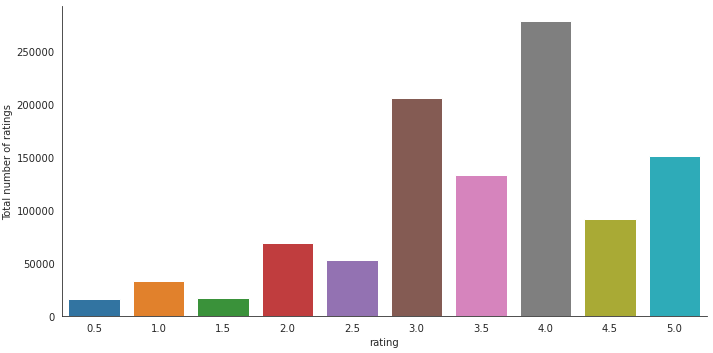

In [11]:
with sns.axes_style('white'):
    g = sns.factorplot("rating", data=df_rating, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")
print (f'Average rating in dataset: {np.mean(df_rating["rating"])}')

Here we see that most viewers rated the movies positively, with a greater proportion of positive reviews (> 3) being given over negative ones (< 3).

<br><br>

 <a id="four"></a>
## 4.0 Content Based Filtering

<a href=#cont>Back to Table of Contents</a>

This section of the project aims at making recommenadations and rating using the content-based aproach. This approach uses the similarity between items to make recommendations. It is based off the assumption that if a user likes a particular item, the user will like items similar to that items. Hence, if a user rates a particular movie very high, there is aa high chance the user will rank other similar movies high. 

### 4.1 Feature Engineering and Selection


This project considers building a recommender off the movie genre, the director and the plot keyword feature. 

#### 4.1.1 Selecting the Required Features

The movie genre is available in the movies dataset, the director and plot keywords features are in the imdb_data dataset. Hence, there is a need to merge both datasets and extract the required features. 

In [26]:
# Extract movieId, title_cast, director and plot_keywords from df_meta
df_meta = df_meta[['movieId', 'title_cast', 'director', 'plot_keywords']]


# merge meta dataset to movies dataset to produce our train dataset
df_train = df_movies.merge(df_meta, on='movieId', how='left')
df_train.head()


,movieId,title,genres,title_cast,director,plot_keywords
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,toy|rivalry|cowboy|cgi animation
1,2,Jumanji (1995),Adventure|Children|Fantasy,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,board game|adventurer|fight|game
2,3,Grumpier Old Men (1995),Comedy|Romance,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,boat|lake|neighbor|rivalry
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,black american|husband wife relationship|betra...
4,5,Father of the Bride Part II (1995),Comedy,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,fatherhood|doberman|dog|mansion


In [27]:
df_train.tail(10)

,movieId,title,genres,title_cast,director,plot_keywords
62413,209145,Liberté (2019),Drama,NaN,NaN,NaN
62414,209147,The Carpet of Horror (1962),Crime|Horror,NaN,NaN,NaN
62415,209151,Mao Zedong 1949 (2019),(no genres listed),NaN,NaN,NaN
62416,209153,Happy Flight (2008),Comedy|Drama,NaN,NaN,NaN
62417,209155,Santosh Subramaniam (2008),Action|Comedy|Romance,NaN,NaN,NaN
62418,209157,We (2018),Drama,NaN,NaN,NaN
62419,209159,Window of the Soul (2001),Documentary,NaN,NaN,NaN
62420,209163,Bad Poems (2018),Comedy|Drama,NaN,NaN,NaN
62421,209169,A Girl Thing (2001),(no genres listed),NaN,NaN,NaN
62422,209171,Women of Devil's Island (1962),Action|Adventure|Drama,NaN,NaN,NaN


<br>

#### 4.1.2 Cleaning the Selected features

The genres and plot keywords feature contains genres and keywords seperated by the '|' character. There is a need to replace the seperator character with a space. On the director feature, there is a need to remove the space between the director name and surname; this is so that the model will not percieve any similarity between Albert Johnson and Albert Robert. They are totally different persons. And lastly, merging the features together and changing them to all lowercasing.

In [28]:
# handle missing data
df_train.fillna(' ', inplace=True)

# replacing "|" and "(no genres listed)" with ' ' in genre
df_train['genres'] = df_train['genres'].apply(lambda x: x.replace("|" , ' ')
                                       .replace("(no genres listed)", ' '))

# replacing "|" and " " with ' ' in director
df_train['director'] = df_train['director'].apply(lambda x: ((x+'|'))
                                            .replace(" ", '')
                                            .replace("|", ''))

# replace "|" with ' ' in plot_keywords
df_train['plot_keywords'] = df_train['plot_keywords'].apply(lambda x: x.replace("|", ''))

# Merge the genres, plot_keywords and director names as our major predictors
df_train_string = df_train['genres'] + " " + df_train['director'] + " " + df_train['plot_keywords']

# change to lower case
df_train_string.apply(str.lower)

# view predictors
df_train_string.head()

0    Adventure Animation Children Comedy Fantasy Jo...
1    Adventure Children Fantasy JonathanHensleigh b...
2    Comedy Romance MarkStevenJohnson boatlakeneigh...
3    Comedy Drama Romance TerryMcMillan black ameri...
4    Comedy AlbertHackett fatherhooddobermandogmansion
dtype: object

#### 4.1.3 Vectorization

To create a model, there is a need to have a set of feature(s) with numerical values since most models only accept numerical values for feature sets. For this project, our feature is a string of words. Hence there is a need to create vectors of digits from these words. The process is called Vectorization.

For this project we define a vectorizer with the following tuning
- analyser = 'word'
- ngram_range = (1, 1)
- max_df = 0.3
- min_df = 20
- stop_words = 'english'

In [29]:
vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1, 1), min_df=10, max_df=0.5, stop_words='english')
features = vectorizer.fit_transform(df_train_string)

features.shape

(62423, 482)

<br>

### 4.2 Recommending

This section contains functions for making movie recommendation for a user using the vectorised features from the previous section. The section contains four functions 

#### 4.2.1 Retrieving Top N Movies Rated by a User

To perform content based filtering, there is a need to retrieve all movies rated by the user under focus sorted by the rating the user ascribe to them in descending order. 

In [16]:
#function to collect all movies rated by a particular user

def all_user_rated_movies(userId, n):
    rated_movies = df_rating[df_rating['userId'] == userId]
    rated_sorted =  rated_movies.sort_values(by='rating', ascending=False)
    return rated_sorted['movieId'].iloc[:n]

#### 4.2.2 Retrieving All Unseen Movies by a User

Similarly, there is also a need to retrieve all movies previously unseen by a user from which we can make recommendation from to avoid recommending movies which has previously been seen by a user.

In [17]:
def all_unseen_movies(userId):
    unseen_movies = df_rating[df_rating['userId'] != userId]['movieId']
    return df_movies[df_movies['movieId'].isin(unseen_movies)].index

#### 4.2.3 Recommending Top N Unseen Movies by user

Using the cosine similarity, the top N similar movies to each top rated movies by the user is recommended for the user.

In [18]:
# Recommend the Top N movies for each top rated movie by a user

def recommend(movie_df, userId, n=10):
    top_rated_movies_id = all_user_rated_movies(userId, int(n/2))
    unseen_movies = all_unseen_movies(userId)
    similarity_list = []
    
    for movieId in list(top_rated_movies_id):
        movie_index = movie_df[movie_df['movieId'] == movieId].index[0]
        sim_matrix = cosine_similarity(features[movie_index], features[unseen_movies])[0]
        
        for i in range(2):
            similarity_list.append(np.argmax(sim_matrix))
            sim_matrix[np.argmax(sim_matrix)] = 0
        
    return df_train.iloc[similarity_list]

Using the recommend function to recommend 15 movies for user with userId 100

In [24]:
recommend(df_movies, 600, 15)

,movieId,title,genres,title_cast,director,plot_keywords
685,700,Angus (1995),Comedy,Perry Anzilotti|Kathy Bates|Robert Curtis Brow...,ChrisCrutcher,based on short storyindependent filmcharacter ...
11164,48783,Flags of Our Fathers (2006),Drama War,Ryan Phillippe|Jesse Bradford|Adam Beach|John ...,WilliamBroylesJr.,reference to arizonapima indianjapanese soldie...
258,261,Little Women (1994),Drama,Winona Ryder|Gabriel Byrne|Trini Alvarado|Sama...,LouisaMayAlcott,american civil warf ratedfemale protagonistref...
897,918,Meet Me in St. Louis (1944),Musical,,,
2,3,Grumpier Old Men (1995),Comedy Romance,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,MarkStevenJohnson,boatlakeneighborrivalry
62,63,Don't Be a Menace to South Central While Drink...,Comedy Crime,Shawn Wayans|Marlon Wayans|Tracey Cherelle Jon...,SouthCentral,hoodparodygrandmothercult film


In [25]:
recommend(df_movies, 25, 15)

,movieId,title,genres,title_cast,director,plot_keywords
239,242,Farinelli: il castrato (1994),Drama Musical,Stefano Dionisi|Enrico Lo Verso|Elsa Zylberste...,AndréeCorbiau,bare chested malemale protagonistsecretbrother...
8434,25903,"Mask of Dimitrios, The (1944)",Crime Drama Film-Noir Mystery,,,
16,17,Sense and Sensibility (1995),Drama Romance,James Fleet|Tom Wilkinson|Harriet Walter|Kate ...,JaneAusten,england19th centurybased on novelblack hair
2257,2348,Sid and Nancy (1986),Drama,,,
486,491,"Man Without a Face, The (1993)",Drama,Mel Gibson|Nick Stahl|Margaret Whitton|Fay Mas...,IsabelleHolland,directorial debutdisfigured facedirected by st...
15230,80432,Our Relations (1936),Comedy,,,
18,19,Ace Ventura: When Nature Calls (1995),Comedy,Jim Carrey|Ian McNeice|Simon Callow|Maynard Ez...,JackBernstein,male objectificationkidnappingcaught masturbat...
1653,1719,"Sweet Hereafter, The (1997)",Drama,Ian Holm|Caerthan Banks|Sarah Polley|Tom McCam...,RussellBanks,slut shaminglawyercommunityschool bus


In [21]:
recommend(df_movies, 600, 15)

,movieId,title,genres,title_cast,director,plot_keywords
685,700,Angus (1995),Comedy,Perry Anzilotti|Kathy Bates|Robert Curtis Brow...,ChrisCrutcher,based on short storyindependent filmcharacter ...
11164,48783,Flags of Our Fathers (2006),Drama War,Ryan Phillippe|Jesse Bradford|Adam Beach|John ...,WilliamBroylesJr.,reference to arizonapima indianjapanese soldie...
258,261,Little Women (1994),Drama,Winona Ryder|Gabriel Byrne|Trini Alvarado|Sama...,LouisaMayAlcott,american civil warf ratedfemale protagonistref...
897,918,Meet Me in St. Louis (1944),Musical,,,
2,3,Grumpier Old Men (1995),Comedy Romance,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,MarkStevenJohnson,boatlakeneighborrivalry
62,63,Don't Be a Menace to South Central While Drink...,Comedy Crime,Shawn Wayans|Marlon Wayans|Tracey Cherelle Jon...,SouthCentral,hoodparodygrandmothercult film


<br><br>

 <a id="five"></a>
## 5.0 Collaborative Filtering

<a href=#cont>Back to Table of Contents</a>

This section of the project aims at making recommenadations and rating using the collaborative aproach. This approach uses the similarity between users to make recommendations. It is based off the assumption that if a user likes a particular item, other users sharing similar trait with the user will most likely like the item. Hence, if a user rates a particular movie very high, there is a high chance another user who enjoys similar rating patern with the use will rank the movie high. 

For the collaborative filtering, we use the surprise package for handling data loading, data manipulation, modelling and testing.

<br>

### 5.1Reducing the Dataset Size

To reduce the dimension of our training dataset, we filter out movies with low ratings ans users who have only rated few movies.